In [23]:
import tensorflow as tf

# Check if TensorFlow can detect a GPU
gpu_device_name = tf.test.gpu_device_name()

if gpu_device_name:
    print('GPU device found:', gpu_device_name)
else:
    print("No GPU available. Using CPU instead.")

No GPU available. Using CPU instead.


In [10]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# RNNs

# zero noise

In [15]:
df = pd.read_csv("/content/drive/MyDrive/AML/A1/df_syn_train_0_0_.csv")

In [16]:
# Separate features and target variable
X = df.drop(['era', 'target_10_val', 'target_5_val'], axis=1)
y = df['era']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [19]:
# Define the number of classes
num_classes = 12

# Preprocess labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Preprocess labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert labels to one-hot encoding
one_hot_encoder = OneHotEncoder(categories=[range(num_classes)], sparse=False)
y_train_one_hot = one_hot_encoder.fit_transform(y_train_encoded.reshape(-1, 1))
y_test_one_hot = one_hot_encoder.transform(y_test_encoded.reshape(-1, 1))

# Reshape input data for RNN
X_train_reshaped = X_train.reshape(-1, 26, 1)
X_test_reshaped = X_test.reshape(-1, 26, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [20]:
# Build the RNN model with additional layers
model = Sequential()
model.add(SimpleRNN(units=64, input_shape=(26, 1), activation='relu', return_sequences=True))
model.add(Dropout(0.2))  # Adding dropout for regularization
model.add(SimpleRNN(units=64, activation='relu', return_sequences=True))
model.add(Dropout(0.2))model = Sequential()

model.add(SimpleRNN(units=64, activation='relu'))  # Last layer without return_sequences=True
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_reshaped, y_train_one_hot, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
176/176 [==============================] - 8s 26ms/step - loss: 12.0234 - accuracy: 0.0826 - val_loss: 2.5882 - val_accuracy: 0.0721
Epoch 2/50
176/176 [==============================] - 4s 25ms/step - loss: 2.8020 - accuracy: 0.0880 - val_loss: 2.4886 - val_accuracy: 0.0833
Epoch 3/50
176/176 [==============================] - 5s 30ms/step - loss: 2.5677 - accuracy: 0.0862 - val_loss: 2.4816 - val_accuracy: 0.1154
Epoch 4/50
176/176 [==============================] - 4s 22ms/step - loss: 2.5246 - accuracy: 0.0839 - val_loss: 2.4911 - val_accuracy: 0.0833
Epoch 5/50
176/176 [==============================] - 4s 25ms/step - loss: 2.5063 - accuracy: 0.0880 - val_loss: 2.4799 - val_accuracy: 0.0769
Epoch 6/50
176/176 [==============================] - 5s 30ms/step - loss: 2.4881 - accuracy: 0.0953 - val_loss: 2.4020 - val_accuracy: 0.1538
Epoch 7/50
176/176 [==============================] - 4s 23ms/step - loss: 2.2375 - accuracy: 0.1517 - val_loss: 1.9339 - val_accuracy: 0.246

In [21]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_reshaped, y_test_one_hot)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

49/49 [==============================] - 0s 8ms/step - loss: 0.4922 - accuracy: 0.7974
Test Loss: 0.492170125246048
Test Accuracy: 0.7974358797073364


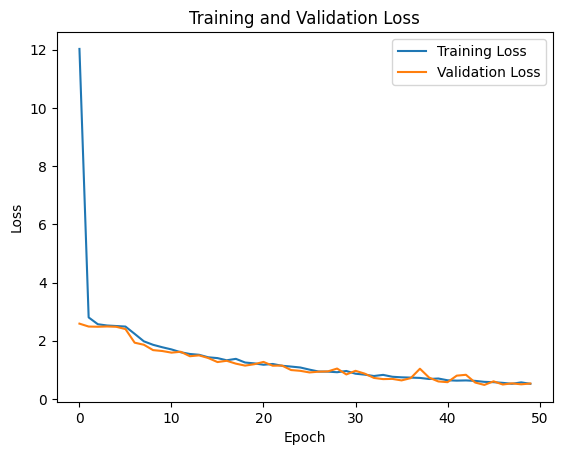

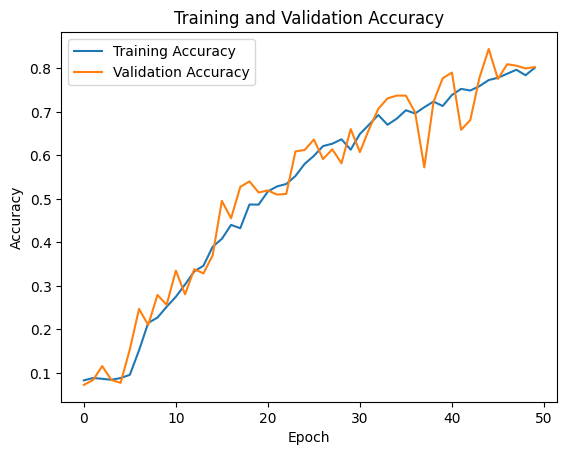

In [22]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Low Noise

In [24]:
df2 = pd.read_csv("/content/drive/MyDrive/AML/A1/df_synA_train_shuffled.csv")

In [25]:
# Separate features and target variable
X2 = df2.drop(['era', 'target_10_val', 'target_5_val', 'data_type'], axis=1)
y2 = df2['era']

In [26]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [27]:
X_train2 = X_train2.values
X_test2 = X_test2.values
y_train2 = y_train2.values
y_test2 = y_test2.values

In [28]:
# Define the number of classes
num_classes = 12

# Preprocess labels
label_encoder = LabelEncoder()
y_train2_encoded = label_encoder.fit_transform(y_train2)
y_test2_encoded = label_encoder.transform(y_test2)

# Convert labels to one-hot encoding
one_hot_encoder = OneHotEncoder(categories=[range(num_classes)], sparse=False)
y_train2_one_hot = one_hot_encoder.fit_transform(y_train2_encoded.reshape(-1, 1))
y_test2_one_hot = one_hot_encoder.transform(y_test2_encoded.reshape(-1, 1))

# Reshape input data for RNN
X_train2_reshaped = X_train2.reshape(-1, 26, 1)
X_test2_reshaped = X_test2.reshape(-1, 26, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [29]:
# Build the RNN model with additional layers
model = Sequential()
model.add(SimpleRNN(units=64, input_shape=(26, 1), activation='relu', return_sequences=True))
model.add(Dropout(0.2))  # Adding dropout for regularization
model.add(SimpleRNN(units=64, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=64, activation='relu'))  # Last layer without return_sequences=True
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train2_reshaped, y_train2_one_hot, epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/20
7020/7020 [==============================] - 182s 25ms/step - loss: 1.9777 - accuracy: 0.3575 - val_loss: 0.9496 - val_accuracy: 0.6382
Epoch 2/20
7020/7020 [==============================] - 165s 24ms/step - loss: 0.9231 - accuracy: 0.6428 - val_loss: 0.7866 - val_accuracy: 0.6915
Epoch 3/20
7020/7020 [==============================] - 167s 24ms/step - loss: 0.8323 - accuracy: 0.6740 - val_loss: 0.8160 - val_accuracy: 0.6750
Epoch 4/20
7020/7020 [==============================] - 162s 23ms/step - loss: 0.7886 - accuracy: 0.6893 - val_loss: 0.7663 - val_accuracy: 0.6982
Epoch 5/20
7020/7020 [==============================] - 164s 23ms/step - loss: 0.7611 - accuracy: 0.6978 - val_loss: 0.7488 - val_accuracy: 0.6939
Epoch 6/20
7020/7020 [==============================] - 169s 24ms/step - loss: 0.7405 - accuracy: 0.7053 - val_loss: 0.6993 - val_accuracy: 0.7214
Epoch 7/20
7020/7020 [==============================] - 164s 23ms/step - loss: 0.7285 - accuracy: 0.7099 - val_loss: 0

In [30]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test2_reshaped, y_test2_one_hot)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

1950/1950 [==============================] - 15s 8ms/step - loss: 0.6360 - accuracy: 0.7428
Test Loss: 0.6359811425209045
Test Accuracy: 0.7427564263343811


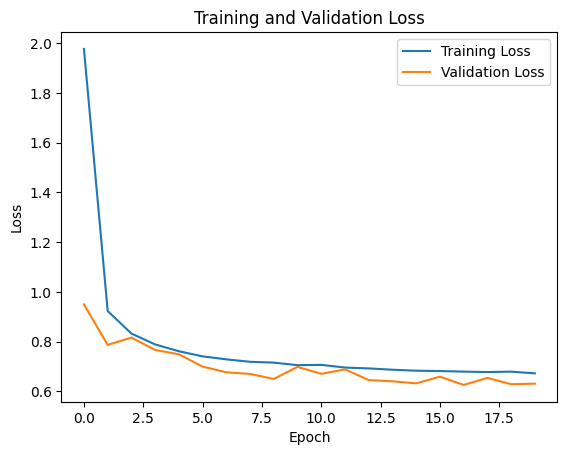

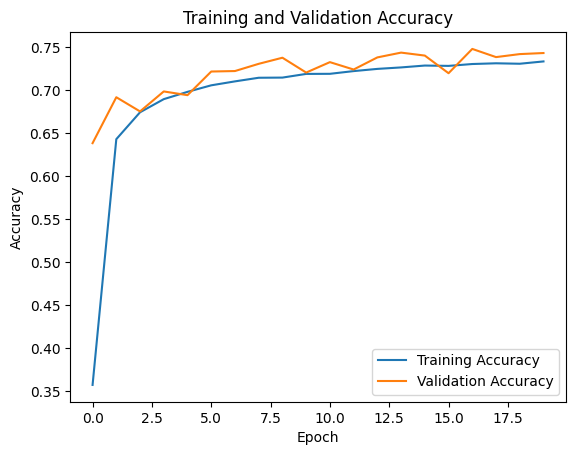

In [31]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


#High Noise

In [32]:
df3 = pd.read_csv("/content/drive/MyDrive/AML/A1/df_synA_test_hard_shuffled_sample.csv")

In [33]:
# Separate features and target variable
X3 = df3.drop(['era', 'target_10_val', 'target_5_val', 'data_type'], axis=1)
y3 = df3['era']

In [34]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [35]:
X_train3 = X_train3.values
X_test3 = X_test3.values
y_train3 = y_train3.values
y_test3 = y_test3.values

In [36]:
# Define the number of classes
num_classes = 12

# Preprocess labels
label_encoder = LabelEncoder()
y_train3_encoded = label_encoder.fit_transform(y_train3)
y_test3_encoded = label_encoder.transform(y_test3)

# Convert labels to one-hot encoding
one_hot_encoder = OneHotEncoder(categories=[range(num_classes)], sparse=False)
y_train3_one_hot = one_hot_encoder.fit_transform(y_train3_encoded.reshape(-1, 1))
y_test3_one_hot = one_hot_encoder.transform(y_test3_encoded.reshape(-1, 1))

# Reshape input data for RNN
X_train3_reshaped = X_train3.reshape(-1, 26, 1)
X_test3_reshaped = X_test3.reshape(-1, 26, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [37]:
# Build the RNN model with additional layers
model3 = Sequential()
model3.add(SimpleRNN(units=64, input_shape=(26, 1), activation='relu', return_sequences=True))
model3.add(Dropout(0.2))  # Adding dropout for regularization
model3.add(SimpleRNN(units=64, activation='relu', return_sequences=True))
model3.add(Dropout(0.2))
model3.add(SimpleRNN(units=64, activation='relu'))  # Last layer without return_sequences=True
model3.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history3 = model3.fit(X_train3_reshaped, y_train3_one_hot, epochs=25, batch_size=32, validation_split=0.1)


Epoch 1/25
5616/5616 [==============================] - 134s 23ms/step - loss: 2.6103 - accuracy: 0.1141 - val_loss: 1.8935 - val_accuracy: 0.3178
Epoch 2/25
5616/5616 [==============================] - 128s 23ms/step - loss: 1.7212 - accuracy: 0.3690 - val_loss: 1.5571 - val_accuracy: 0.4275
Epoch 3/25
5616/5616 [==============================] - 130s 23ms/step - loss: 1.5646 - accuracy: 0.4261 - val_loss: 1.4846 - val_accuracy: 0.4557
Epoch 4/25
5616/5616 [==============================] - 127s 23ms/step - loss: 1.5071 - accuracy: 0.4437 - val_loss: 1.4608 - val_accuracy: 0.4578
Epoch 5/25
5616/5616 [==============================] - 127s 23ms/step - loss: 1.4734 - accuracy: 0.4570 - val_loss: 1.4138 - val_accuracy: 0.4761
Epoch 6/25
5616/5616 [==============================] - 130s 23ms/step - loss: 1.4521 - accuracy: 0.4634 - val_loss: 1.3972 - val_accuracy: 0.4707
Epoch 7/25
5616/5616 [==============================] - 129s 23ms/step - loss: 1.4353 - accuracy: 0.4667 - val_loss: 1

In [38]:
# Evaluate the model on the test set
loss, accuracy = model3.evaluate(X_test3_reshaped, y_test3_one_hot)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

1560/1560 [==============================] - 12s 8ms/step - loss: 1.3259 - accuracy: 0.5006
Test Loss: 1.3259143829345703
Test Accuracy: 0.500580906867981


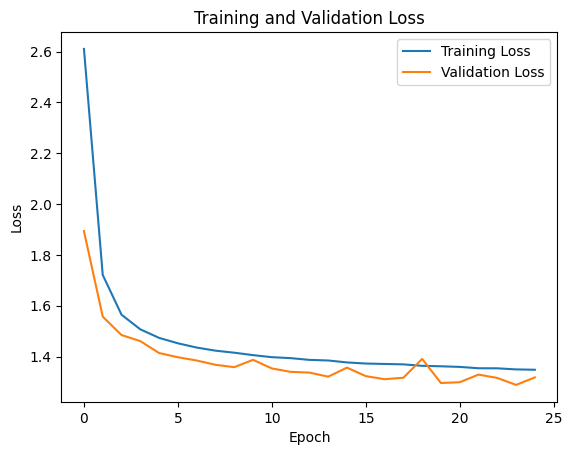

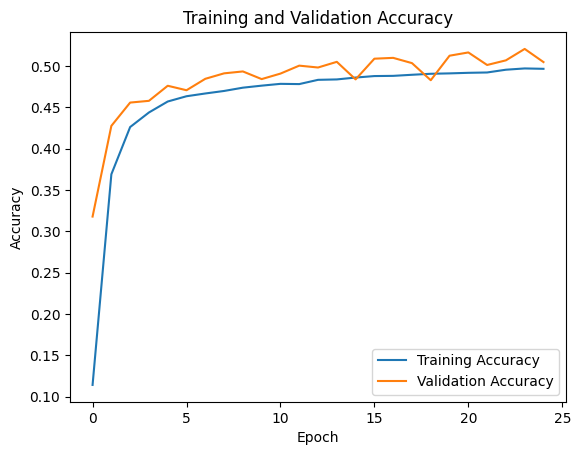

In [39]:
# Plot the training and validation loss
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()